In [1]:
!python --version

Python 3.10.6


In [2]:
!pip uninstall keras -y
!pip uninstall tensorflow -y

Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1
Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0


In [3]:
!pip install numpy pandas scikit-learn tensorflowjs

  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/k4u5h4L/whatsmyworth.git

fatal: destination path 'whatsmyworth' already exists and is not an empty directory.


In [6]:
df = pd.read_csv('./whatsmyworth/data/Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [8]:
cond = {"Bachelor's Degree": "Bachelor's", "Master's Degree": "Master's", "phD": "PhD"}
def fix_edu(x):
  if x not in cond:
    return x
  else:
    return cond[x]

In [9]:
df['Education Level'] = df['Education Level'].apply(fix_edu)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [10]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, 'High School'], dtype=object)

In [11]:
print(len(df))
df = df.dropna()
print(len(df))

6704
6698


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
columns_to_transform = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']

In [14]:
for col in columns_to_transform:
  le = LabelEncoder()

  le.fit(df[col])
  df[col]= le.transform(df[col])
  mapping = {}
  for c, tc in zip(le.inverse_transform(df[col].unique()), df[col].unique()):
    mapping[c] = tc
  print(mapping)

{'Male': 1, 'Female': 0, 'Other': 2}
{"Bachelor's": 0, "Master's": 2, 'PhD': 3, 'High School': 1}
{'Software Engineer': 175, 'Data Analyst': 18, 'Senior Manager': 144, 'Sales Associate': 115, 'Director': 25, 'Marketing Analyst': 93, 'Product Manager': 106, 'Sales Manager': 118, 'Marketing Coordinator': 94, 'Senior Scientist': 165, 'Software Developer': 174, 'HR Manager': 47, 'Financial Analyst': 40, 'Project Manager': 109, 'Customer Service Rep': 14, 'Operations Manager': 102, 'Marketing Manager': 96, 'Senior Engineer': 130, 'Data Entry Clerk': 19, 'Sales Director': 116, 'Business Analyst': 4, 'VP of Operations': 189, 'IT Support': 53, 'Recruiter': 112, 'Financial Manager': 41, 'Social Media Specialist': 173, 'Software Manager': 177, 'Junior Developer': 66, 'Senior Consultant': 126, 'Product Designer': 105, 'CEO': 7, 'Accountant': 1, 'Data Scientist': 20, 'Marketing Specialist': 97, 'Technical Writer': 184, 'HR Generalist': 46, 'Project Engineer': 108, 'Customer Success Rep': 17, 'Sale

In [15]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1,0,175,5.0,90000.0,3,9
1,28.0,0,2,18,3.0,65000.0,4,5
2,45.0,1,3,144,15.0,150000.0,1,9
3,36.0,0,0,115,7.0,60000.0,4,5
4,52.0,1,2,25,20.0,200000.0,4,1


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1337)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
input_shape = X_train.shape[1]

In [19]:
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1821 (7.11 KB)
Trainable params: 1821 (7.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [22]:
num_epochs = 50
history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stop]
          )

Epoch 1/50
168/168 [==============================] - 2s 4ms/step - loss: 15984504832.0000 - mae: 114825.7578 - val_loss: 14864139264.0000 - val_mae: 110433.3984
Epoch 2/50
168/168 [==============================] - 0s 3ms/step - loss: 13337055232.0000 - mae: 102819.7891 - val_loss: 10088242176.0000 - val_mae: 86810.0391
Epoch 3/50
168/168 [==============================] - 0s 2ms/step - loss: 7226803200.0000 - mae: 70396.9453 - val_loss: 4572548096.0000 - val_mae: 55201.8867
Epoch 4/50
168/168 [==============================] - 0s 2ms/step - loss: 3905600256.0000 - mae: 51032.2773 - val_loss: 3459265792.0000 - val_mae: 47987.6367
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 3367727104.0000 - mae: 47120.1641 - val_loss: 3129460480.0000 - val_mae: 45704.8867
Epoch 6/50
168/168 [==============================] - 0s 2ms/step - loss: 3033542400.0000 - mae: 44842.5898 - val_loss: 2784744704.0000 - val_mae: 43205.3477
Epoch 7/50
168/168 [=========================

In [23]:
pred = model.predict(X_test)

42/42 [==============================] - 0s 1ms/step


In [24]:
inp = X_test.iloc[0]
# pred1 = model.predict(inp)
inp

Age                    26.0
Gender                  0.0
Education Level         2.0
Job Title              64.0
Years of Experience     1.5
Country                 1.0
Race                    1.0
Name: 174, dtype: float64

In [25]:
model.predict([[26.0, 0.0, 3.0, 64.0, 1.5, 1.0, 1.0]])

1/1 [==============================] - 0s 74ms/step


array([[76600.375]], dtype=float32)

In [26]:
pred[0]

array([72661.74], dtype=float32)

In [27]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

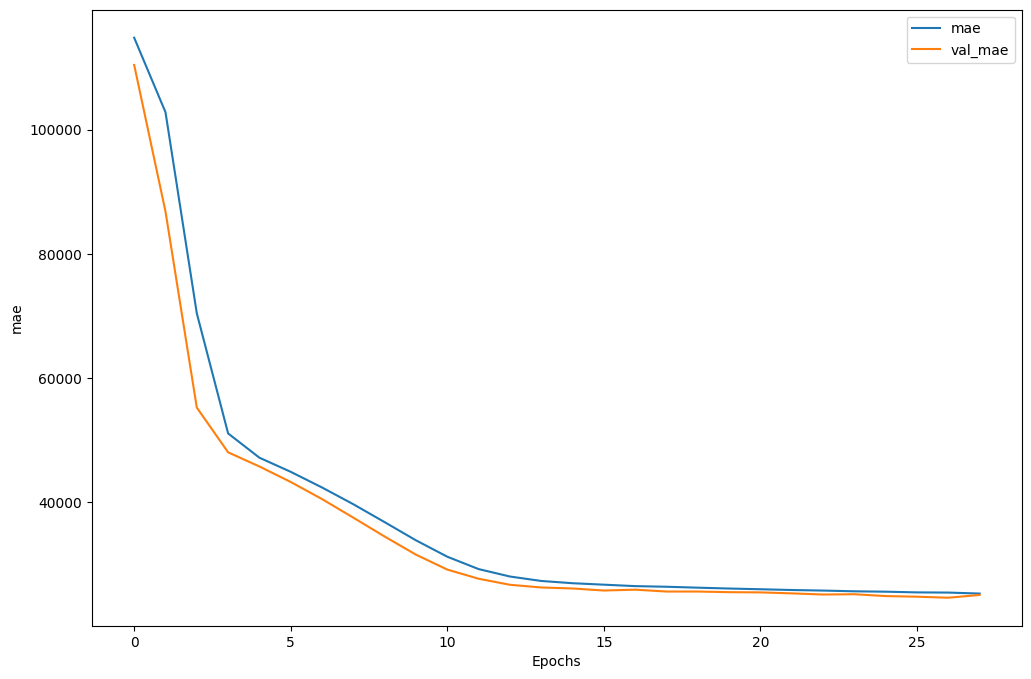

In [28]:
plt.figure(figsize=(12, 8))

plot_graphs(history, "mae")

In [29]:
model.save('whatsmyworth_model.keras')

In [30]:
import tensorflowjs as tfjs

In [31]:
tfjs.converters.save_keras_model(model, "./tfjs_model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
